In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")
df.shape

(5110, 12)

In [3]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [4]:
df=df.drop(['id'], axis=1)
df=df.dropna(subset = ["bmi"])
df=df.drop(df[df["gender"]=="Other"].index)
df['age']=df['age'].astype('int')
df=df.drop(df[(df["stroke"]==1)& (df["age"]<10)].index)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4908 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4908 non-null   object 
 1   age                4908 non-null   int32  
 2   hypertension       4908 non-null   int64  
 3   heart_disease      4908 non-null   int64  
 4   ever_married       4908 non-null   object 
 5   work_type          4908 non-null   object 
 6   Residence_type     4908 non-null   object 
 7   avg_glucose_level  4908 non-null   float64
 8   bmi                4908 non-null   float64
 9   smoking_status     4908 non-null   object 
 10  stroke             4908 non-null   int64  
dtypes: float64(2), int32(1), int64(3), object(5)
memory usage: 601.0+ KB


In [5]:
def smoke(text):
    if text == 'never smoked' or text == 'Unknown':
        return 'never smoked'
    else:
        return 'smoke'

In [6]:
df['smoking_status'] = df['smoking_status'].apply(smoke)
print(df['ever_married'].value_counts())
print(df['work_type'].value_counts())
print(df['gender'].value_counts())
print(df['Residence_type'].value_counts())
print(df['smoking_status'].value_counts())
df.head()

Yes    3204
No     1704
Name: ever_married, dtype: int64
Private          2810
Self-employed     775
children          671
Govt_job          630
Never_worked       22
Name: work_type, dtype: int64
Female    2897
Male      2011
Name: gender, dtype: int64
Urban    2490
Rural    2418
Name: Residence_type, dtype: int64
never smoked    3335
smoke           1573
Name: smoking_status, dtype: int64


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67,0,1,Yes,Private,Urban,228.69,36.6,smoke,1
2,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smoke,1
4,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81,0,0,Yes,Private,Urban,186.21,29.0,smoke,1


In [7]:
X = df.drop('stroke',axis=1)
y = df["stroke"]
print(X.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4908 entries, 0 to 5109
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4908 non-null   object 
 1   age                4908 non-null   int32  
 2   hypertension       4908 non-null   int64  
 3   heart_disease      4908 non-null   int64  
 4   ever_married       4908 non-null   object 
 5   work_type          4908 non-null   object 
 6   Residence_type     4908 non-null   object 
 7   avg_glucose_level  4908 non-null   float64
 8   bmi                4908 non-null   float64
 9   smoking_status     4908 non-null   object 
dtypes: float64(2), int32(1), int64(2), object(5)
memory usage: 562.6+ KB
None


In [8]:
def plot_train_time_curve(train_sizes, fit_times, title, alpha=0.1):
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)
    plt.plot(train_sizes, fit_times_mean, label='train points', color='blue', marker='o')
    plt.fill_between(train_sizes, fit_times_mean + fit_times_std,
                     fit_times_mean - fit_times_std, color='blue', alpha=alpha)
    plt.title(title)
    plt.xlabel('Number of training points')
    plt.ylabel('Training time')
    plt.grid(ls='--')
    plt.legend(loc='best')
    plt.show()


In [9]:
def plot_validation_curve(param_range, train_scores, test_scores, x_label, title, alpha=0.1):
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    plt.plot(param_range, train_mean, label='train score', color='blue', marker='o')
    plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, color='blue', alpha=alpha)
    plt.plot(param_range, test_mean, label='validation score', color='red', marker='o')
    plt.fill_between(param_range, test_mean + test_std, test_mean - test_std, color='red', alpha=alpha)
    plt.title(title)
    plt.grid(ls='--')
    plt.xlabel(x_label)
    plt.ylabel('F1 score')
    plt.legend(loc='best')
    plt.show()



In [10]:
def plot_learning_curve(train_sizes, train_scores, test_scores, title, alpha=0.1):
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    plt.plot(train_sizes, train_mean, label='train score', color='blue', marker='o')
    plt.fill_between(train_sizes, train_mean + train_std,
                     train_mean - train_std, color='blue', alpha=alpha)
    plt.plot(train_sizes, test_mean, label='validation score', color='red', marker='o')

    plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, color='red', alpha=alpha)
    plt.title(title)
    plt.xlabel('Number of training points')
    plt.ylabel('F1 score')
    plt.grid(ls='--')
    plt.legend(loc='best')
    plt.show()
    plt.savefig(title+".png")


In [11]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler,OneHotEncoder
from sklearn.pipeline import make_pipeline
#from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import learning_curve,validation_curve
from sklearn.model_selection import RepeatedStratifiedKFold, StratifiedKFold
from sklearn.compose import make_column_transformer
from sklearn.compose import make_column_selector 
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=40)
print(X_train.shape)
scaler = StandardScaler()
one_hot_encoder = OneHotEncoder()

numercial_cols = ['age', 'bmi', 'avg_glucose_level']
catergorical_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

data_prep = make_column_transformer((make_pipeline(scaler), numercial_cols),
                                  (make_pipeline(one_hot_encoder), catergorical_cols),
                                  remainder="passthrough")

X_train = data_prep.fit_transform(X_train)
X_test = data_prep.fit_transform(X_test)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)




(3435, 10)
(3435, 18)
(3435,)
(1473, 18)
(1473,)


In [12]:
from collections import Counter
print(Counter(y_train))
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.7)
steps = [('u', under)]
pipeline = Pipeline(steps=steps)

X_train, y_train = pipeline.fit_resample(X_train, y_train)
print(X_train.shape)
print(y_train.shape)
print(Counter(y_train))

Counter({0: 3289, 1: 146})
(354, 18)
(354,)
Counter({0: 208, 1: 146})


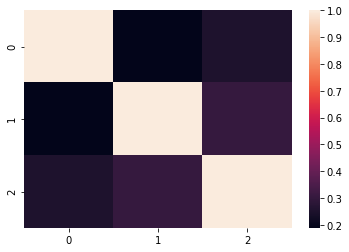

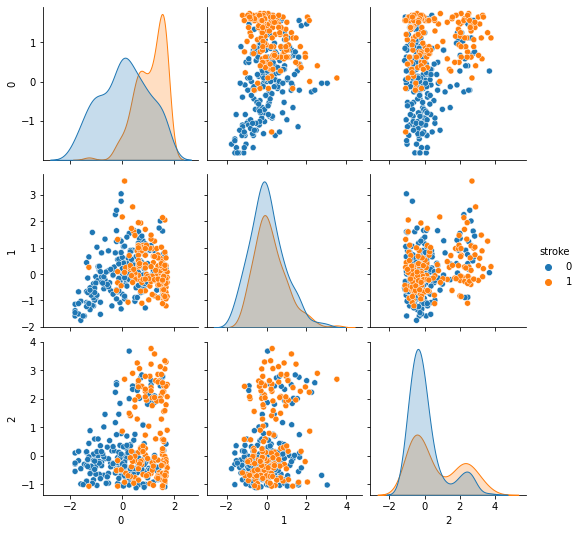

In [67]:
import seaborn as sns
newdf=pd.DataFrame(X_train)
sns.heatmap(newdf[newdf.columns[0:3].tolist()].corr())
newdf['stroke']=y_train
cols_to_plot = newdf.columns[0:3].tolist() + ['stroke']
sns.pairplot(newdf[cols_to_plot], hue='stroke')


# K-MEANS

In [95]:
from sklearn.cluster import KMeans
def k_means(X, range_n_clusters):
    inertias = []
    for n_cluster in range_n_clusters:
        kmeans = KMeans(n_clusters=n_cluster,random_state=40).fit(X)
        inertias.append(kmeans.inertia_)


    fig, ax = plt.subplots()
    ax.plot(range_n_clusters, inertias, 'o-')
    ax.grid()
    plt.xlabel("k")
    plt.ylabel("WCSS")
    plt.show()

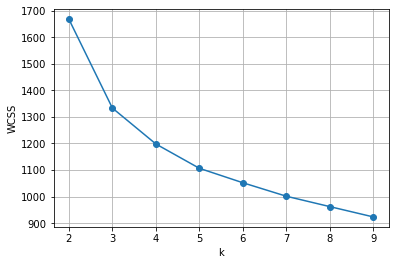

In [36]:
range_n_clusters=list(range(2, 10, 1))
k_means(X_train,range_n_clusters)

# Silhouette

In [81]:
from sklearn.metrics import adjusted_mutual_info_score
from sklearn.metrics import silhouette_samples, silhouette_score,accuracy_score,v_measure_score
from sklearn.metrics.cluster import adjusted_mutual_info_score
from sklearn.cluster import KMeans
import time

def silhouette_analysis(data, range_n_clusters, algo_name):
    silhouette_scores=[]
    wall_clock_times=[]
    for n_cluster in range_n_clusters:
        start = time.time()
        if algo_name=="k-Means":
            clusterer = KMeans(n_clusters=n_cluster, random_state=40)
        elif algo_name=="GMM":
            clusterer = GaussianMixture(n_components=n_cluster,random_state=40,covariance_type="full")
        y_pred = clusterer.fit_predict(data)
        sil_coeff = silhouette_score(data, y_pred)
        silhouette_scores.append(sil_coeff)
        elapsed_time = time.time() - start
        wall_clock_times.append(elapsed_time)
        #print("For n_clusters={}, The Silhouette Score is {}".format(n_cluster, sil_coeff))
        print("For n_clusters={}, Time elapsed {}".format(n_cluster, elapsed_time))
        print("-----------------------------------------------------------------------------")
    return silhouette_scores,wall_clock_times

In [82]:
from sklearn.metrics import adjusted_mutual_info_score
from sklearn.metrics import silhouette_samples, silhouette_score,accuracy_score,v_measure_score
from sklearn.metrics.cluster import adjusted_mutual_info_score
from sklearn.cluster import KMeans
import time

def ami_analysis(data, range_n_clusters, algo_name):
    ami_scores=[]
    wall_clock_times=[]
    for n_cluster in range_n_clusters:
        start = time.time()
        if algo_name=="k-Means":
            clusterer = KMeans(n_clusters=n_cluster, random_state=40)
        elif algo_name=="GMM":
            clusterer = GaussianMixture(n_components=n_cluster,random_state=40,covariance_type="full")
        y_pred = clusterer.fit_predict(data)
        ami_score = adjusted_mutual_info_score(y_train, y_pred)
        ami_scores.append(ami_score)
        elapsed_time = time.time() - start
        wall_clock_times.append(elapsed_time)
        #print("For n_clusters={}, The Adjusted MI Score is {}".format(n_cluster, ami_score))
        #print("For n_clusters={}, Time elapsed {}".format(n_cluster, elapsed_time))
        #print("-----------------------------------------------------------------------------")
    return ami_scores,wall_clock_times

In [79]:
from sklearn.metrics import adjusted_mutual_info_score
from sklearn.metrics import silhouette_samples, silhouette_score,accuracy_score,v_measure_score
from sklearn.metrics.cluster import adjusted_mutual_info_score
from sklearn.cluster import KMeans

def silhouette_ami_plot(data, range_n_clusters, algo_name):
    silhouette_scores,times_elapsed = silhouette_analysis(data, range_n_clusters, algo_name)
    ami_scores = ami_analysis(data, range_n_clusters, algo_name)
    # plotting the scores against the value of k
    plt.plot(range_n_clusters, silhouette_scores, 'o-', label='Silhouette')
    plt.plot(range_n_clusters, ami_scores, 'o-', label='AMI-Score')
    plt.plot(range_n_clusters, times_elapsed, 'o-', label='Wall Clock Time')
    plt.xlabel('k')
    plt.ylabel('Scores')
    plt.legend(loc=4)
    plt.show()
    

For n_clusters=2, The Silhouette Score is 0.2630096860966529
-----------------------------------------------------------------------------
For n_clusters=3, The Silhouette Score is 0.24175505095668315
-----------------------------------------------------------------------------
For n_clusters=4, The Silhouette Score is 0.20367997442034286
-----------------------------------------------------------------------------
For n_clusters=5, The Silhouette Score is 0.1924244872653558
-----------------------------------------------------------------------------
For n_clusters=6, The Silhouette Score is 0.169856020381433
-----------------------------------------------------------------------------
For n_clusters=7, The Silhouette Score is 0.1757308991205282
-----------------------------------------------------------------------------
For n_clusters=8, The Silhouette Score is 0.159066031059098
-----------------------------------------------------------------------------
For n_clusters=9, The Silho

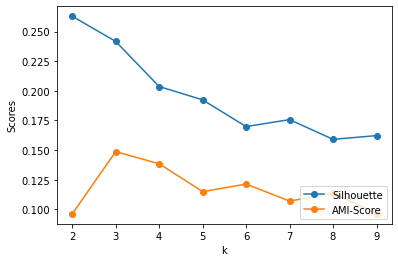

In [40]:
range_n_clusters=list(range(2, 10, 1))
silhouette_ami_plot(X_train,range_n_clusters,"k-Means")

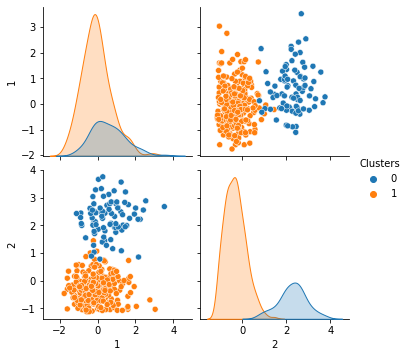

In [76]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2,random_state=40).fit(X_train)
y_pred = kmeans.fit_predict(X_train)
import seaborn as sns
kmeansDf = pd.DataFrame(X_train)
kmeansDf['Clusters']=y_pred
#print(kmeansDf.head())
cols_to_plot = kmeansDf.columns[[1,2]].tolist() + ['Clusters']
sns.pairplot(kmeansDf[cols_to_plot], hue='Clusters')
plt.show()

# EMM

In [23]:
from sklearn.mixture import GaussianMixture
def bic_analysis(data,n_components):
    bic_scores=[]
    for n_cluster in n_components:
        clusterer = GaussianMixture(n_components=n_cluster,random_state=40,covariance_type="full")
        clusterer.fit(data)
        bic_score = clusterer.bic(data)
        bic_scores.append(bic_score)
        print("For n_components={}, The BIC Score is {}".format(n_cluster, bic_score))
        print("-----------------------------------------------------------------------------")
    return bic_scores

In [22]:
from sklearn.mixture import GaussianMixture
def bic_plot(data,n_components):
    bic_scores=bic_analysis(data,n_components)
    plt.plot(n_components, bic_scores, 'o-', label='BIC')
    plt.xlabel('Components')
    plt.ylabel('Scores')
    plt.legend(loc=4)
    plt.show()

For n_components=1, The BIC Score is -17366.50629756695
-----------------------------------------------------------------------------
For n_components=2, The BIC Score is -27590.691385773574
-----------------------------------------------------------------------------
For n_components=3, The BIC Score is -26694.398916251183
-----------------------------------------------------------------------------
For n_components=4, The BIC Score is -27681.455455545216
-----------------------------------------------------------------------------
For n_components=5, The BIC Score is -28530.013623683153
-----------------------------------------------------------------------------
For n_components=6, The BIC Score is -27973.344806487716
-----------------------------------------------------------------------------
For n_components=7, The BIC Score is -27272.665932422296
-----------------------------------------------------------------------------
For n_components=8, The BIC Score is -24602.66869173294


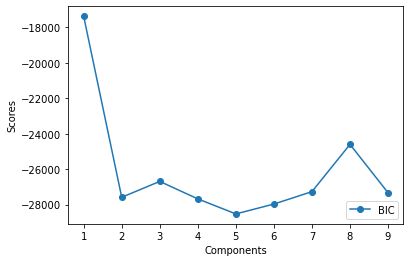

In [43]:
n_components = np.arange(1, 10)
bic_plot(X_train,n_components)

In [26]:
from sklearn.mixture import GaussianMixture
def gmm_ami_plot(data,n_components):
    ami_scores = ami_analysis(data, n_components, "GMM")
    plt.plot(n_components, ami_scores, 'o-', label='AMI-Score')
    plt.xlabel('Components')
    plt.ylabel('Scores')
    plt.legend(loc=4)
    plt.show()

For n_clusters=1, The Adjusted MI Score is -5.2420738621975934e-15
-----------------------------------------------------------------------------
For n_clusters=2, The Adjusted MI Score is 0.08973377108206496
-----------------------------------------------------------------------------
For n_clusters=3, The Adjusted MI Score is 0.08840774126160375
-----------------------------------------------------------------------------
For n_clusters=4, The Adjusted MI Score is 0.12096179754473814
-----------------------------------------------------------------------------
For n_clusters=5, The Adjusted MI Score is 0.11072685482433835
-----------------------------------------------------------------------------
For n_clusters=6, The Adjusted MI Score is 0.1240426630394241
-----------------------------------------------------------------------------
For n_clusters=7, The Adjusted MI Score is 0.10909112908561654
-----------------------------------------------------------------------------
For n_clus

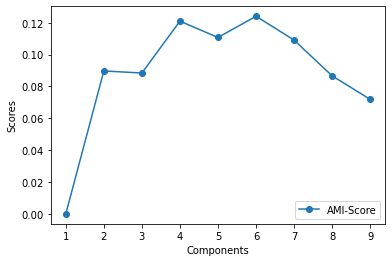

In [45]:
n_components = np.arange(1, 10)
gmm_ami_plot(X_train,n_components)

For n_clusters=2, Time elapsed 0.022408246994018555
-----------------------------------------------------------------------------
For n_clusters=3, Time elapsed 0.016112565994262695
-----------------------------------------------------------------------------
For n_clusters=4, Time elapsed 0.026998281478881836
-----------------------------------------------------------------------------
For n_clusters=5, Time elapsed 0.029024839401245117
-----------------------------------------------------------------------------
For n_clusters=6, Time elapsed 0.01944589614868164
-----------------------------------------------------------------------------
For n_clusters=7, Time elapsed 0.030874252319335938
-----------------------------------------------------------------------------
For n_clusters=8, Time elapsed 0.024372577667236328
-----------------------------------------------------------------------------
For n_clusters=9, Time elapsed 0.05701565742492676
----------------------------------------

ValueError: x and y must have same first dimension, but have shapes (8,) and (2, 8)

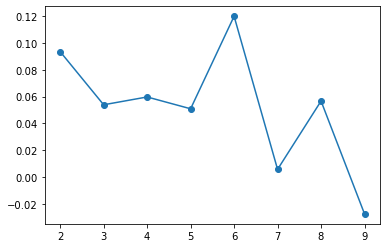

In [83]:
range_n_clusters=list(range(2, 10, 1))
silhouette_ami_plot(X_train,range_n_clusters,"GMM")

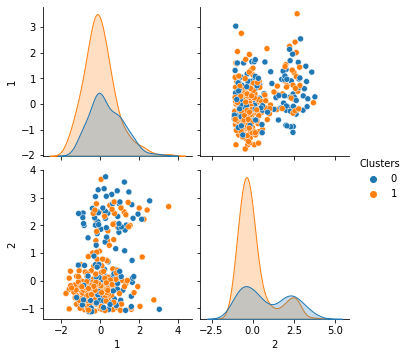

In [77]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(2, covariance_type='full', random_state=40)
y_pred = gmm.fit_predict(X_train)
import seaborn as sns
gmmDf = pd.DataFrame(X_train)
gmmDf['Clusters']=y_pred
#print(kmeansDf.head())
cols_to_plot = gmmDf.columns[[1,2]].tolist() + ['Clusters']
sns.pairplot(gmmDf[cols_to_plot], hue='Clusters')
plt.show()

# PCA

In [46]:
def biplot(score,coeff,variables=None,targets=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    classes = np.unique(targets)
    colors = ['b','silver','y','g']
    for s,l in enumerate(classes):
        plt.scatter(xs[targets==l]* scalex,ys[targets==l] * scaley,s=5, c = colors[s], marker='o') # color based on group
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if variables is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'black', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, variables[i], color = 'black', ha = 'center', va = 'center')
 
    plt.xlabel("Component {}".format(1))
    plt.ylabel("Component {}".format(2))
    plt.grid()

In [47]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, random_state=40)
X_pca_2d=pca.fit_transform(X_train)
# Calculate the variance explained by priciple components
print('Variance of each component:', pca.explained_variance_ratio_)
print('Total Variance Explained:', round(sum(list(pca.explained_variance_ratio_))*100, 2))

Variance of each component: [0.33223285 0.15632916]
Total Variance Explained: 48.86


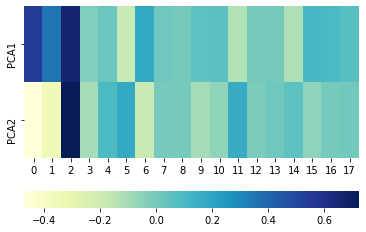

In [48]:
import seaborn as sns
ax = sns.heatmap(pca.components_,
                 cmap='YlGnBu',
                 yticklabels=[ "PCA"+str(x) for x in range(1,pca.n_components_+1)],
                 xticklabels=pd.DataFrame(X_train).columns.values,
                 cbar_kws={"orientation": "horizontal"})

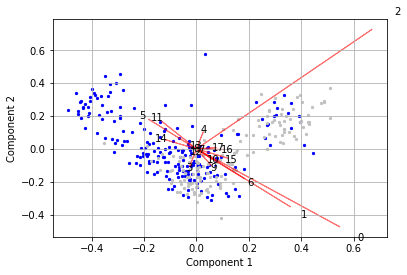

In [49]:
biplot(X_pca_2d[:,0:2],np.transpose(pca.components_[0:2, :]),pd.DataFrame(X_train).columns.values,y_train)
plt.show()

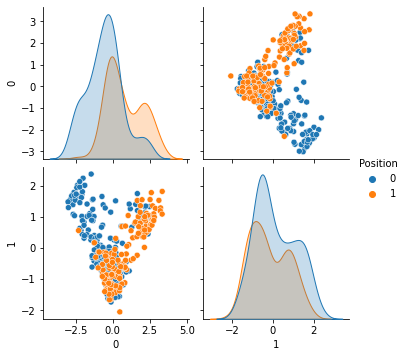

In [189]:
import seaborn as sns
pcaDf = pd.DataFrame(X_pca_2d)
pcaDf['Position']=y_train
sns.pairplot(pcaDf, hue='Position')
plt.show()

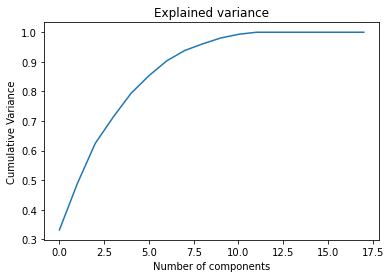

In [50]:
from sklearn.decomposition import PCA
#fitting the pca algorithm with our data
pca=PCA(random_state=40).fit(X_train)
#plotting the cumulative summation of the explained variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative Variance')
plt.title('Explained variance')
plt.show()

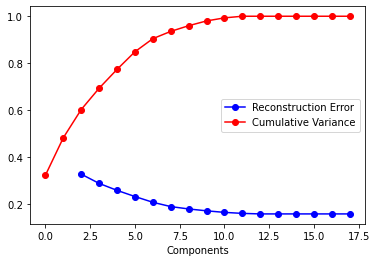

<Figure size 432x288 with 0 Axes>

In [22]:
from sklearn.decomposition import PCA
dims_fifa = list(range(2, 18, 1))
reconstruction_error=[]
for dim in dims_fifa:
    pca = PCA(n_components=dim, random_state=40)
    x_prime = pca.fit_transform(X_train)
    
    A = np.linalg.pinv(pca.components_.T)
    reconstructed = np.dot(x_prime, A)
    rc_err = mean_squared_error(X_train, reconstructed)  
    reconstruction_error.append(rc_err)
        
plt.plot(dims_fifa,reconstruction_error, label='Reconstruction Error', color='b', marker='o')
pca1=PCA(random_state=40).fit(X_train)
#plotting the cumulative summation of the explained variance

plt.plot(np.cumsum(pca1.explained_variance_ratio_),label='Cumulative Variance', color='r', marker='o')
plt.xlabel('Components')
plt.legend(loc='best')
plt.figure()
plt.show()

In [108]:
from sklearn.decomposition import PCA
pca = PCA(n_components=8)
X_pca=pca.fit_transform(X_train)
# Calculate the variance explained by priciple components
print('Variance of each component:', pca.explained_variance_ratio_)
print('Total Variance Explained:', round(sum(list(pca.explained_variance_ratio_))*100, 2))
cov_matrix = np.dot(X_train.T,X_train)/X_train.shape[0]
eigen_values = pca.explained_variance_ratio_
for eigenvalue, eigenvector in zip(eigen_values,pca.components_):
    print(np.dot(eigenvector.T, np.dot(cov_matrix,eigenvector)))
    #print(eigenvalue)

Variance of each component: [0.30850461 0.16218129 0.13564352 0.08908546 0.08298122 0.06834411
 0.05716788 0.03397018]
Total Variance Explained: 93.79
2.121794207789337
0.9939885492496018
0.8020356842109108
0.5783240125357064
0.4971760033018871
0.40726689824612405
0.4874037014859453
0.20594838919819863


# PCA k-Means

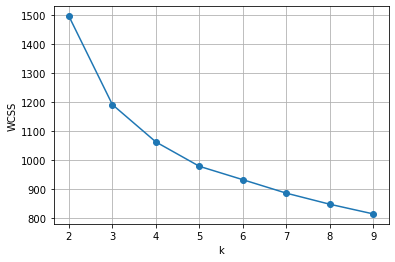

In [96]:
range_n_clusters=list(range(2, 10, 1))
k_means(X_pca,range_n_clusters)

# PCA EMM

For n_components=1, The BIC Score is 6655.6365598826005
-----------------------------------------------------------------------------
For n_components=2, The BIC Score is 6532.14416179111
-----------------------------------------------------------------------------
For n_components=3, The BIC Score is 5762.998291362874
-----------------------------------------------------------------------------
For n_components=4, The BIC Score is 5595.218013356577
-----------------------------------------------------------------------------
For n_components=5, The BIC Score is 4587.4929785514
-----------------------------------------------------------------------------
For n_components=6, The BIC Score is 4572.363088859322
-----------------------------------------------------------------------------
For n_components=7, The BIC Score is 4906.903374517235
-----------------------------------------------------------------------------
For n_components=8, The BIC Score is 3655.587657535185
----------------

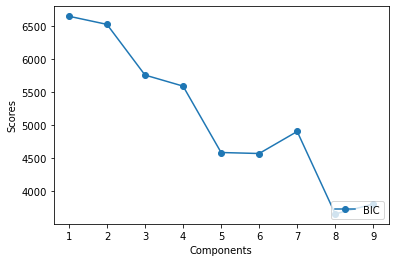

In [86]:
n_components = np.arange(1, 10)
bic_plot(X_pca,n_components)

For n_clusters=1, The Adjusted MI Score is -5.2420738621975934e-15
-----------------------------------------------------------------------------
For n_clusters=2, The Adjusted MI Score is 0.09258205849900064
-----------------------------------------------------------------------------
For n_clusters=3, The Adjusted MI Score is 0.16043753013680626
-----------------------------------------------------------------------------
For n_clusters=4, The Adjusted MI Score is 0.1232958199119748
-----------------------------------------------------------------------------
For n_clusters=5, The Adjusted MI Score is 0.11690920499422693
-----------------------------------------------------------------------------
For n_clusters=6, The Adjusted MI Score is 0.11265018823032429
-----------------------------------------------------------------------------
For n_clusters=7, The Adjusted MI Score is 0.11988229097638664
-----------------------------------------------------------------------------
For n_clus

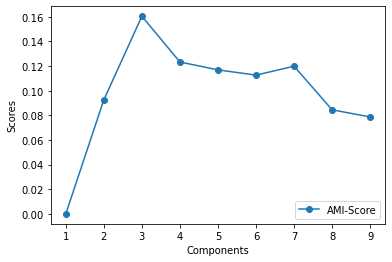

In [57]:
n_components = np.arange(1, 10)
gmm_ami_plot(X_pca,n_components)

# ICA

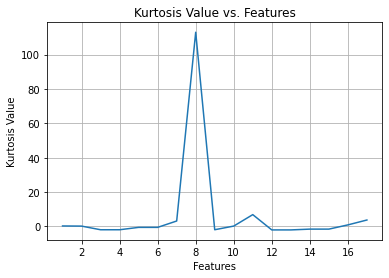

In [197]:
import scipy.stats
from sklearn.decomposition import FastICA
testDf=pd.DataFrame(X_train)
kurtosis_values = []
dims_fifa = list(range(1, 18, 1))
features=[]
for i in dims_fifa:
    kur = scipy.stats.kurtosis(testDf[i])
    kurtosis_values.append(kur)
    if kur>0.5 or kur<-.5:
        features.append(i)
kurtosis_values = np.array(kurtosis_values)
plt.plot(dims_fifa,kurtosis_values)
plt.xlabel('Features')
plt.ylabel('Kurtosis Value')
plt.title('Kurtosis Value vs. Features')
plt.grid()
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA 

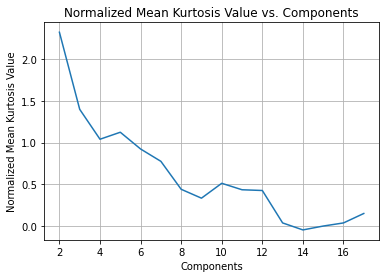

In [71]:
import scipy.stats
from sklearn.decomposition import FastICA
kurtosis_values = []
dims_fifa = list(range(2, 18, 1))
for i in dims_fifa:
    fast_ica = FastICA(n_components = i,random_state=40,max_iter=1000,tol=.1)
    data_ica = fast_ica.fit_transform(X_train)
    kur = scipy.stats.kurtosis(fast_ica.components_.transpose())
    #kur = scipy.stats.kurtosis(data_ica)
    #print(kur)
    kurtosis_values.append(np.mean(kur)/i)
kurtosis_values = np.array(kurtosis_values)
plt.plot(dims_fifa,kurtosis_values)
plt.xlabel('Components')
plt.ylabel('Normalized Mean Kurtosis Value')
plt.title('Normalized Mean Kurtosis Value vs. Components')
plt.grid()
plt.show()


In [36]:
from sklearn.decomposition import FastICA
fast_ica = FastICA(n_components=2, random_state=40,max_iter=1000,tol=.001)
X_ica=fast_ica.fit_transform(X_train)

(18, 2)
(18,)
[1.60621919 0.35151656]


<AxesSubplot:>

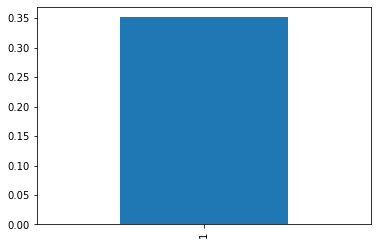

In [38]:
from sklearn.feature_selection import mutual_info_regression,f_regression
print(fast_ica.components_.T.shape)
print(fast_ica.components_[0].shape)

mi = mutual_info_regression(fast_ica.components_.T, fast_ica.components_[0])
print(mi)
pd_mi= pd.Series(mi[1:2])
pd_mi.index=list(range(1,2))
pd_mi.plot.bar()

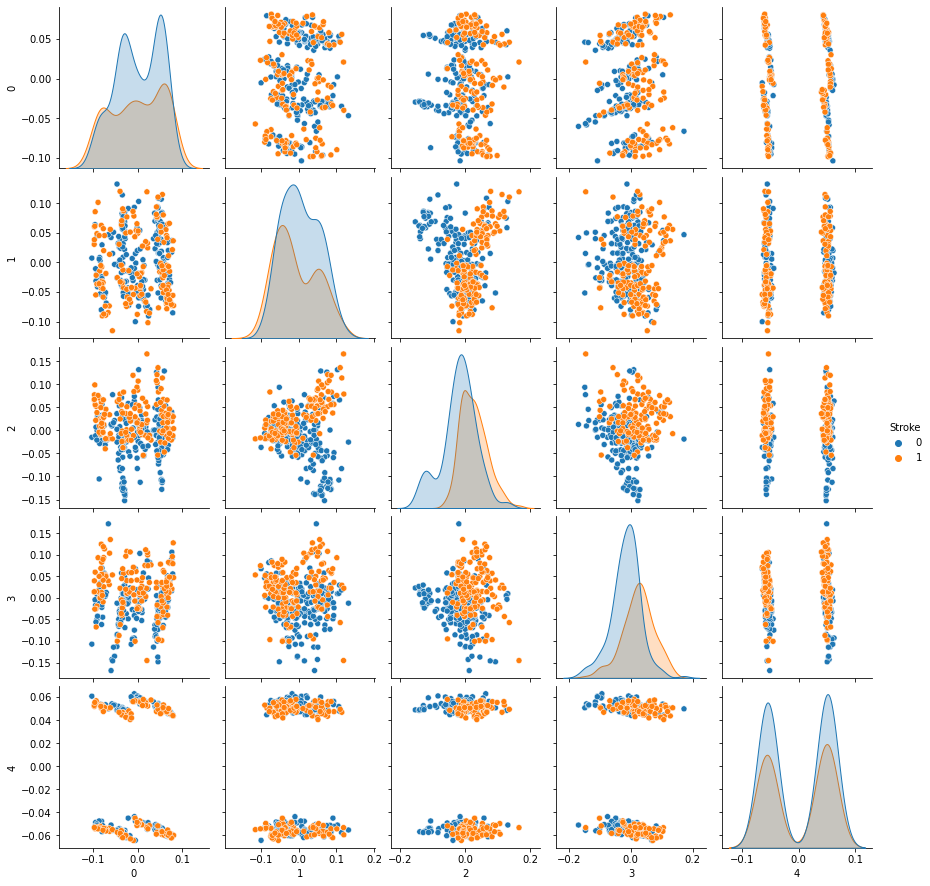

In [35]:
import seaborn as sns
icaDf = pd.DataFrame(X_ica)
icaDf['Stroke']=y_train
sns.pairplot(icaDf, hue='Stroke')
plt.show()

# ICA k-Means

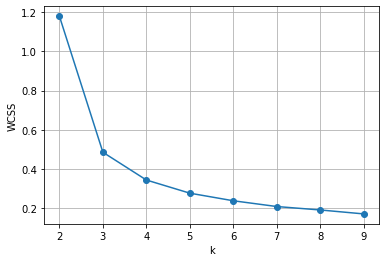

In [61]:
range_n_clusters=list(range(2, 10, 1))
k_means(X_ica,range_n_clusters)

For n_clusters=2, The Silhouette Score is 0.4902663006741325
-----------------------------------------------------------------------------
For n_clusters=3, The Silhouette Score is 0.5792373500383745
-----------------------------------------------------------------------------
For n_clusters=4, The Silhouette Score is 0.47003392104578373
-----------------------------------------------------------------------------
For n_clusters=5, The Silhouette Score is 0.4321258469239508
-----------------------------------------------------------------------------
For n_clusters=6, The Silhouette Score is 0.38482859636072714
-----------------------------------------------------------------------------
For n_clusters=7, The Silhouette Score is 0.3725376393717307
-----------------------------------------------------------------------------
For n_clusters=8, The Silhouette Score is 0.35640307739392324
-----------------------------------------------------------------------------
For n_clusters=9, The Si

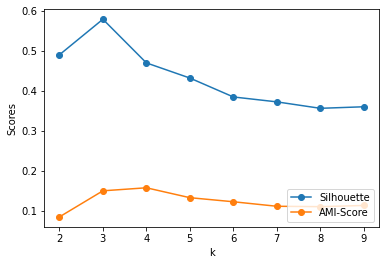

In [62]:
range_n_clusters=list(range(2, 10, 1))
silhouette_ami_plot(X_ica,range_n_clusters,"k-Means")

# ICA EMM

For n_components=1, The BIC Score is -2116.898722574292
-----------------------------------------------------------------------------
For n_components=2, The BIC Score is -2406.235013783126
-----------------------------------------------------------------------------
For n_components=3, The BIC Score is -2460.076755228942
-----------------------------------------------------------------------------
For n_components=4, The BIC Score is -2442.1544820155823
-----------------------------------------------------------------------------
For n_components=5, The BIC Score is -2417.270507477109
-----------------------------------------------------------------------------
For n_components=6, The BIC Score is -2412.1860022582673
-----------------------------------------------------------------------------
For n_components=7, The BIC Score is -2387.4679607043677
-----------------------------------------------------------------------------
For n_components=8, The BIC Score is -2362.5814566492495
--

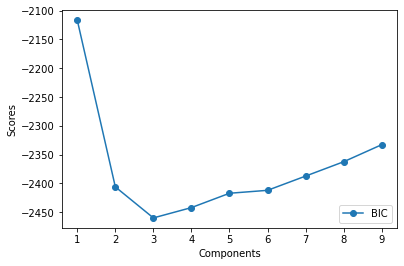

In [39]:
n_components = np.arange(1, 10)
bic_plot(X_ica,n_components)

ValueError: x and y must have same first dimension, but have shapes (9,) and (2, 9)

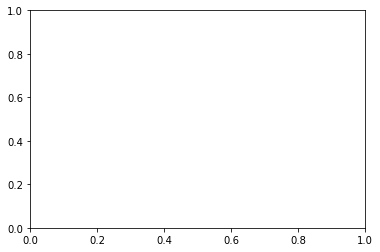

In [40]:
n_components = np.arange(1, 10)
gmm_ami_plot(X_ica,n_components)

# RP

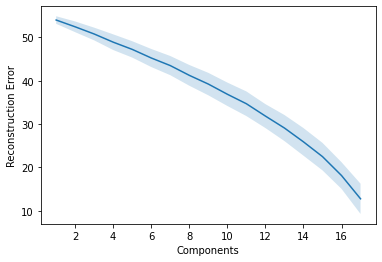

In [84]:
from sklearn.random_projection import GaussianRandomProjection
from sklearn.metrics import mean_squared_error
dims_fifa = list(range(1, 18, 1))
reconstruction_error = []
reconstruction_variance = []
for dim in dims_fifa:
    mean_mse = []
    for j in range(0,500):
        grp = GaussianRandomProjection(n_components=dim)
        X_prime = grp.fit_transform(X_train)
        W = grp.components_
        W_pinv = np.linalg.pinv(W).transpose()
        rec_data = np.dot(X_prime, W_pinv)
        dist = np.linalg.norm(X_train-rec_data)
        mean_mse.append(dist)
        
    reconstruction_variance.append(np.std(mean_mse))
    reconstruction_error.append(np.mean(mean_mse))
    
reconstruction_error = np.array(reconstruction_error)
plt.plot(dims_fifa,reconstruction_error)
plt.fill_between(dims_fifa,reconstruction_error - reconstruction_variance, reconstruction_error + reconstruction_variance, alpha=0.2)
plt.xlabel('Components')
plt.ylabel('Reconstruction Error')
plt.show()

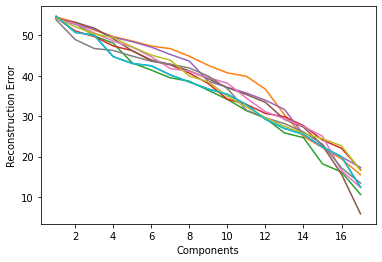

In [25]:
from sklearn.random_projection import GaussianRandomProjection
from sklearn.metrics import mean_squared_error
import random
dims_fifa = list(range(1, 18, 1))
reconstruction_error = []
from numpy.random import randint
random_seeds = randint(10, 100, 10)
for seed in random_seeds:
    mean_mse = []
    for dim in dims_fifa:
        grp = GaussianRandomProjection(random_state=seed,n_components=dim)
        X_prime = grp.fit_transform(X_train)
        W = grp.components_
        W_pinv = np.linalg.pinv(W).transpose()
        rec_data = np.dot(X_prime, W_pinv)
        dist = np.linalg.norm(X_train-rec_data)
        mean_mse.append(dist)

        #print(str(dim) +"-> "+str(dist))
    plt.plot(dims_fifa,mean_mse)
    #plt.fill_between(dims_fifa,reconstruction_error - reconstruction_variance, reconstruction_error + reconstruction_variance, alpha=0.2)
    plt.xlabel('Components')
    plt.ylabel('Reconstruction Error')
plt.show()

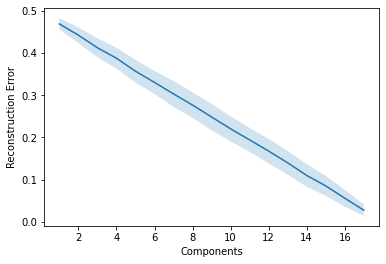

In [72]:
from sklearn.random_projection import GaussianRandomProjection
from sklearn.metrics import mean_squared_error
dims_fifa = list(range(1, 18, 1))
reconstruction_error = []
reconstruction_variance = []
for dim in dims_fifa:
    mean_mse = []
    for j in range(0,500):
        grp = GaussianRandomProjection(n_components=dim)
        x_prime = grp.fit_transform(X_train)
        # reconstruction
        A = np.linalg.pinv(grp.components_.T)
        rec_data = np.dot(x_prime, A)
        mean_mse.append(mean_squared_error(X_train, rec_data))
        
    reconstruction_variance.append(np.std(mean_mse))
    reconstruction_error.append(np.mean(mean_mse))
    
reconstruction_error = np.array(reconstruction_error)
plt.plot(dims_fifa,reconstruction_error)
plt.fill_between(dims_fifa,reconstruction_error - reconstruction_variance, reconstruction_error + reconstruction_variance, alpha=0.2)
plt.xlabel('Components')
plt.ylabel('Reconstruction Error')
plt.show()

In [36]:
from sklearn.random_projection import GaussianRandomProjection
grp = GaussianRandomProjection(n_components=14, random_state=40)
X_rp = grp.fit_transform(X_train)

# RP k-Means

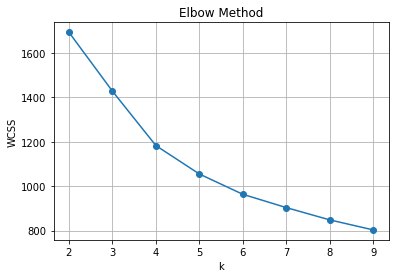

In [208]:
range_n_clusters=list(range(2, 10, 1))
k_means(X_rp,range_n_clusters)

For n_clusters=2, The Silhouette Score is 0.17862821953152483
-----------------------------------------------------------------------------
For n_clusters=3, The Silhouette Score is 0.18693707406116736
-----------------------------------------------------------------------------
For n_clusters=4, The Silhouette Score is 0.21425000359561347
-----------------------------------------------------------------------------
For n_clusters=5, The Silhouette Score is 0.20524006382409518
-----------------------------------------------------------------------------
For n_clusters=6, The Silhouette Score is 0.21805271025613657
-----------------------------------------------------------------------------
For n_clusters=7, The Silhouette Score is 0.20115138816412784
-----------------------------------------------------------------------------
For n_clusters=8, The Silhouette Score is 0.1931183563114826
-----------------------------------------------------------------------------
For n_clusters=9, The

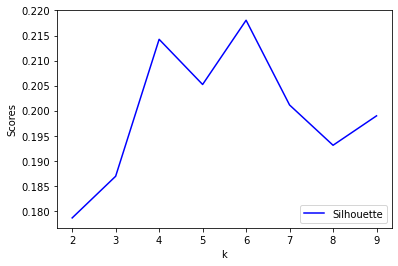

In [209]:
range_n_clusters=list(range(2, 10, 1))
silhouette_scores_rp_kmeans = silhouette_plot(X_rp,range_n_clusters,"k-Means")

# RP EMM

For n_components=1, The BIC Score is -2465.1244882374367
-----------------------------------------------------------------------------
For n_components=2, The BIC Score is -8474.170092386197
-----------------------------------------------------------------------------
For n_components=3, The BIC Score is -12306.677803565583
-----------------------------------------------------------------------------
For n_components=4, The BIC Score is -13923.251123487014
-----------------------------------------------------------------------------
For n_components=5, The BIC Score is -11281.078136557038
-----------------------------------------------------------------------------
For n_components=6, The BIC Score is -13570.423548954313
-----------------------------------------------------------------------------
For n_components=7, The BIC Score is -15650.410833472066
-----------------------------------------------------------------------------
For n_components=8, The BIC Score is -14809.2425866704
-

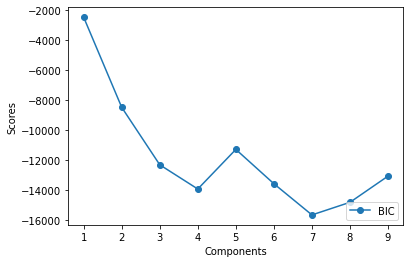

In [111]:
n_components = np.arange(1, 10)
bic_plot(X_rp,n_components)

# Feature selection ExtraTreesClassifier

In [91]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
clf = ExtraTreesClassifier(random_state=40,n_estimators=100)
clf = clf.fit(X_train, y_train)
etcDf = pd.DataFrame()
etcDf["Importances"]= clf.feature_importances_
etcDf = etcDf.sort_values(['Importances'], ascending=False)
etc_model = SelectFromModel(clf, prefit=True)
X_etc = etc_model.transform(X_train)
print(X_etc.shape)

(354, 4)


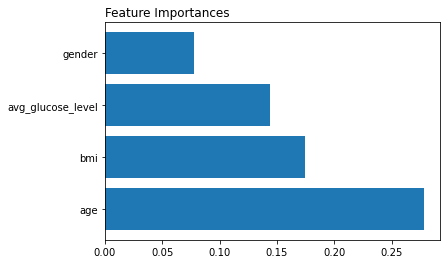

In [93]:
import pandas as pd
from matplotlib import pyplot as plt
features = ['age', 'bmi', 'avg_glucose_level','gender']
importances = etcDf["Importances"].head(4)
# Horizontal Bar Plot
plt.barh(features, importances)
# Add Plot Title
plt.title('Feature Importances',
             loc ='left', )
# Show Plot
plt.show()

# ETC k-Means

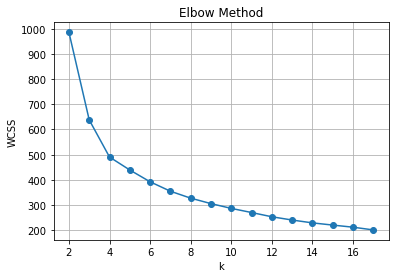

In [154]:
range_n_clusters=list(range(2, 10, 1))
k_means(X_etc,range_n_clusters)

For n_clusters=2, The Silhouette Score is 0.4095617942294883
-----------------------------------------------------------------------------
For n_clusters=3, The Silhouette Score is 0.38967454139807867
-----------------------------------------------------------------------------
For n_clusters=4, The Silhouette Score is 0.3680706525606329
-----------------------------------------------------------------------------
For n_clusters=5, The Silhouette Score is 0.3427516621147781
-----------------------------------------------------------------------------
For n_clusters=6, The Silhouette Score is 0.28637956231417294
-----------------------------------------------------------------------------
For n_clusters=7, The Silhouette Score is 0.2672684403895758
-----------------------------------------------------------------------------
For n_clusters=8, The Silhouette Score is 0.28255470149984
-----------------------------------------------------------------------------
For n_clusters=9, The Silho

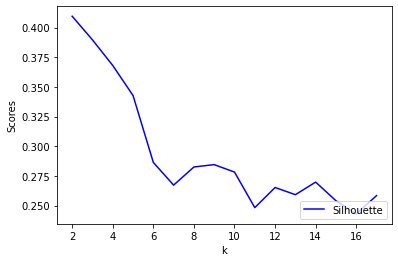

In [155]:
range_n_clusters=list(range(2, 10, 1))
silhouette_scores_etc_kmeans = silhouette_plot(X_etc,range_n_clusters,"k-Means")

For n_clusters=2, The Adjusted MI Score is 0.07096455298897922
-----------------------------------------------------------------------------
For n_clusters=3, The Adjusted MI Score is 0.1301880380871775
-----------------------------------------------------------------------------
For n_clusters=4, The Adjusted MI Score is 0.13078608392418628
-----------------------------------------------------------------------------
For n_clusters=5, The Adjusted MI Score is 0.12174193697527476
-----------------------------------------------------------------------------
For n_clusters=6, The Adjusted MI Score is 0.1264097452693384
-----------------------------------------------------------------------------
For n_clusters=7, The Adjusted MI Score is 0.10880288282666298
-----------------------------------------------------------------------------
For n_clusters=8, The Adjusted MI Score is 0.12263040835649558
-----------------------------------------------------------------------------
For n_clusters=

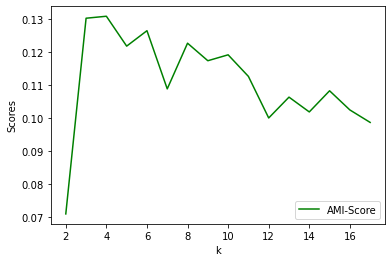

In [156]:
range_n_clusters=list(range(2, 10, 1))
ami_scores_etc_kmeans = ami_plot(X_etc,range_n_clusters,"k-Means")

# ETC EMM

For n_components=1, The BIC Score is 3399.9417788681344
-----------------------------------------------------------------------------
For n_components=2, The BIC Score is 3137.637924271988
-----------------------------------------------------------------------------
For n_components=3, The BIC Score is -750.7254678585459
-----------------------------------------------------------------------------
For n_components=4, The BIC Score is -715.9230420024119
-----------------------------------------------------------------------------
For n_components=5, The BIC Score is -653.9345448291081
-----------------------------------------------------------------------------
For n_components=6, The BIC Score is -577.0599053134695
-----------------------------------------------------------------------------
For n_components=7, The BIC Score is -689.5363086766322
-----------------------------------------------------------------------------
For n_components=8, The BIC Score is -757.3381161634936
-------

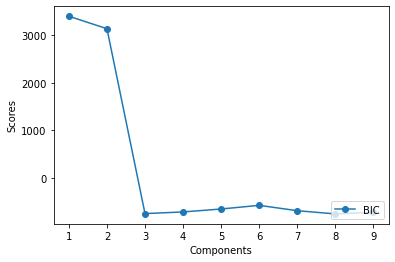

In [112]:
n_components = np.arange(1, 10)
bic_plot(X_etc,n_components)

# Comparison DR-KMeans

In [103]:
print(X_train.shape)
print(X_pca.shape)
print(X_ica.shape)
print(X_rp.shape)
print(X_etc.shape)

(354, 18)
(354, 8)
(354, 2)
(354, 14)
(354, 4)


In [39]:
def silhouette_comparison_plot(range_n_clusters, algo_name):
    sil_scores, sil_times = silhouette_analysis(X_train, range_n_clusters, algo_name)
    sil_pca_scores, sil_pca_times = silhouette_analysis(X_pca, range_n_clusters, algo_name)
    sil_ica_scores, sil_ica_times = silhouette_analysis(X_ica, range_n_clusters, algo_name)
    sil_rp_scores, sil_rp_times = silhouette_analysis(X_rp, range_n_clusters, algo_name)
    sil_etc_scores, sil_etc_times = silhouette_analysis(X_etc, range_n_clusters, algo_name)
    # plotting the scores against the value of k
    plt.plot(range_n_clusters, sil_scores, 'o-', label='Original Silhouette')
    plt.plot(range_n_clusters, sil_pca_scores, 'o-', label='PCA Silhouette')
    plt.plot(range_n_clusters, sil_ica_scores, 'o-', label='ICA Silhouette')
    plt.plot(range_n_clusters, sil_rp_scores, 'o-', label='RP Silhouette')
    plt.plot(range_n_clusters, sil_etc_scores, 'o-', label='ETC Silhouette')
    plt.xlabel('k')
    plt.ylabel('Scores')
    plt.legend(loc=4)
    plt.show()
    

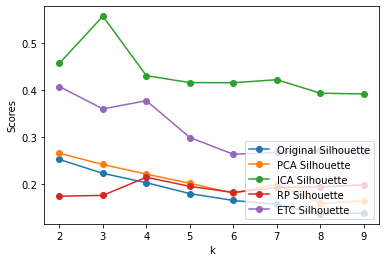

In [46]:
range_n_clusters=list(range(2, 10, 1))
silhouette_comparison_plot(range_n_clusters, "k-Means")

In [47]:
range_n_clusters=list(range(2, 10, 1))

In [52]:
sil_scores, sil_times = silhouette_analysis(X_train, range_n_clusters, "k-Means")

For n_clusters=2, Time elapsed 0.03357720375061035
-----------------------------------------------------------------------------
For n_clusters=3, Time elapsed 0.032587528228759766
-----------------------------------------------------------------------------
For n_clusters=4, Time elapsed 0.04021811485290527
-----------------------------------------------------------------------------
For n_clusters=5, Time elapsed 0.0386202335357666
-----------------------------------------------------------------------------
For n_clusters=6, Time elapsed 0.04166531562805176
-----------------------------------------------------------------------------
For n_clusters=7, Time elapsed 0.05271434783935547
-----------------------------------------------------------------------------
For n_clusters=8, Time elapsed 0.050885915756225586
-----------------------------------------------------------------------------
For n_clusters=9, Time elapsed 0.0561976432800293
----------------------------------------------

In [55]:
sil_pca_scores, sil_pca_times = silhouette_analysis(X_pca, range_n_clusters, "k-Means")

For n_clusters=2, Time elapsed 0.0327451229095459
-----------------------------------------------------------------------------
For n_clusters=3, Time elapsed 0.03302478790283203
-----------------------------------------------------------------------------
For n_clusters=4, Time elapsed 0.047183990478515625
-----------------------------------------------------------------------------
For n_clusters=5, Time elapsed 0.04846930503845215
-----------------------------------------------------------------------------
For n_clusters=6, Time elapsed 0.04309344291687012
-----------------------------------------------------------------------------
For n_clusters=7, Time elapsed 0.051650285720825195
-----------------------------------------------------------------------------
For n_clusters=8, Time elapsed 0.04833340644836426
-----------------------------------------------------------------------------
For n_clusters=9, Time elapsed 0.05498099327087402
---------------------------------------------

In [57]:
sil_ica_scores, sil_ica_times = silhouette_analysis(X_ica, range_n_clusters, "k-Means")

For n_clusters=2, Time elapsed 0.02991485595703125
-----------------------------------------------------------------------------
For n_clusters=3, Time elapsed 0.021417617797851562
-----------------------------------------------------------------------------
For n_clusters=4, Time elapsed 0.03578805923461914
-----------------------------------------------------------------------------
For n_clusters=5, Time elapsed 0.03586220741271973
-----------------------------------------------------------------------------
For n_clusters=6, Time elapsed 0.03730344772338867
-----------------------------------------------------------------------------
For n_clusters=7, Time elapsed 0.03710174560546875
-----------------------------------------------------------------------------
For n_clusters=8, Time elapsed 0.05042624473571777
-----------------------------------------------------------------------------
For n_clusters=9, Time elapsed 0.04585146903991699
---------------------------------------------

In [69]:
sil_rp_scores, sil_rp_times = silhouette_analysis(X_rp, range_n_clusters, "k-Means")

For n_clusters=2, Time elapsed 0.039565086364746094
-----------------------------------------------------------------------------
For n_clusters=3, Time elapsed 0.030399322509765625
-----------------------------------------------------------------------------
For n_clusters=4, Time elapsed 0.029839515686035156
-----------------------------------------------------------------------------
For n_clusters=5, Time elapsed 0.03565478324890137
-----------------------------------------------------------------------------
For n_clusters=6, Time elapsed 0.033743858337402344
-----------------------------------------------------------------------------
For n_clusters=7, Time elapsed 0.03941059112548828
-----------------------------------------------------------------------------
For n_clusters=8, Time elapsed 0.0476841926574707
-----------------------------------------------------------------------------
For n_clusters=9, Time elapsed 0.04698324203491211
-------------------------------------------

In [70]:
sil_etc_scores, sil_etc_times = silhouette_analysis(X_etc, range_n_clusters, "k-Means")

For n_clusters=2, Time elapsed 0.028315305709838867
-----------------------------------------------------------------------------
For n_clusters=3, Time elapsed 0.030166149139404297
-----------------------------------------------------------------------------
For n_clusters=4, Time elapsed 0.03237605094909668
-----------------------------------------------------------------------------
For n_clusters=5, Time elapsed 0.042243242263793945
-----------------------------------------------------------------------------
For n_clusters=6, Time elapsed 0.04705524444580078
-----------------------------------------------------------------------------
For n_clusters=7, Time elapsed 0.04472613334655762
-----------------------------------------------------------------------------
For n_clusters=8, Time elapsed 0.05031728744506836
-----------------------------------------------------------------------------
For n_clusters=9, Time elapsed 0.045476675033569336
------------------------------------------

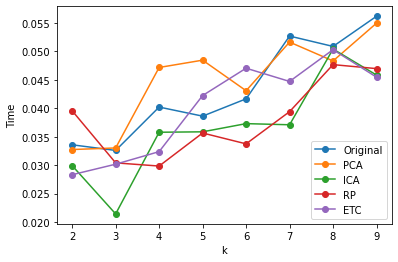

In [71]:
plt.plot(range_n_clusters, sil_times, 'o-', label='Original')
plt.plot(range_n_clusters, sil_pca_times, 'o-', label='PCA')
plt.plot(range_n_clusters, sil_ica_times, 'o-', label='ICA')
plt.plot(range_n_clusters, sil_rp_times, 'o-', label='RP')
plt.plot(range_n_clusters, sil_etc_times, 'o-', label='ETC')
plt.xlabel('k')
plt.ylabel('Time')
plt.legend(loc=4)
plt.show()

In [78]:
range_n_clusters=list(range(2, 10, 1))
algo_name = "k-Means"
ami_original_scores, ami_times = ami_analysis(X_train, range_n_clusters, algo_name)
ami_pca_scores, ami_pca_times = ami_analysis(X_pca, range_n_clusters, algo_name)
ami_ica_scores, ami_ica_times = ami_analysis(X_ica, range_n_clusters, algo_name)
ami_rp_scores, ami_rp_times = ami_analysis(X_rp, range_n_clusters, algo_name)
ami_etc_scores, ami_etc_times = ami_analysis(X_etc, range_n_clusters, algo_name)

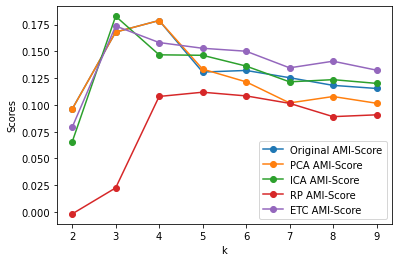

In [79]:
# plotting the scores against the value of k
plt.plot(range_n_clusters, ami_original_scores, 'o-', label='Original AMI-Score')
plt.plot(range_n_clusters, ami_pca_scores, 'o-', label='PCA AMI-Score')
plt.plot(range_n_clusters, ami_ica_scores, 'o-', label='ICA AMI-Score')
plt.plot(range_n_clusters, ami_rp_scores, 'o-', label='RP AMI-Score')
plt.plot(range_n_clusters, ami_etc_scores, 'o-', label='ETC AMI-Score')
plt.xlabel('k')
plt.ylabel('Scores')
plt.legend(loc=4)
plt.show()

# Comparison DR- EMM

In [76]:
range_n_clusters=list(range(2, 10, 1))
algo_name = "GMM"
sil_original_scores,sil_times = silhouette_analysis(X_train, range_n_clusters, algo_name)
sil_pca_scores,sil_pca_times = silhouette_analysis(X_pca, range_n_clusters, algo_name)
sil_ica_scores,sil_ica_times = silhouette_analysis(X_ica, range_n_clusters, algo_name)
sil_rp_scores,sil_rp_times = silhouette_analysis(X_rp, range_n_clusters, algo_name)
sil_etc_scores,sil_etc_times = silhouette_analysis(X_etc, range_n_clusters, algo_name)

For n_clusters=2, Time elapsed 0.02056741714477539
-----------------------------------------------------------------------------
For n_clusters=3, Time elapsed 0.017408132553100586
-----------------------------------------------------------------------------
For n_clusters=4, Time elapsed 0.02351689338684082
-----------------------------------------------------------------------------
For n_clusters=5, Time elapsed 0.015389442443847656
-----------------------------------------------------------------------------
For n_clusters=6, Time elapsed 0.015772581100463867
-----------------------------------------------------------------------------
For n_clusters=7, Time elapsed 0.03359079360961914
-----------------------------------------------------------------------------
For n_clusters=8, Time elapsed 0.03582048416137695
-----------------------------------------------------------------------------
For n_clusters=9, Time elapsed 0.025802135467529297
------------------------------------------

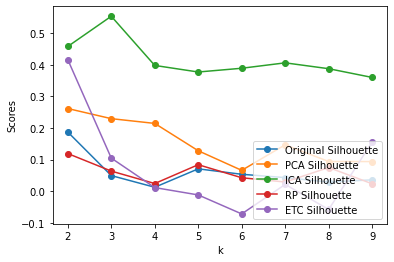

In [77]:
# plotting the scores against the value of k
plt.plot(range_n_clusters, sil_original_scores, 'o-', label='Original Silhouette')
plt.plot(range_n_clusters, sil_pca_scores, 'o-', label='PCA Silhouette')
plt.plot(range_n_clusters, sil_ica_scores, 'o-', label='ICA Silhouette')
plt.plot(range_n_clusters, sil_rp_scores, 'o-', label='RP Silhouette')
plt.plot(range_n_clusters, sil_etc_scores, 'o-', label='ETC Silhouette')
plt.xlabel('k')
plt.ylabel('Scores')
plt.legend(loc=4)
plt.show()

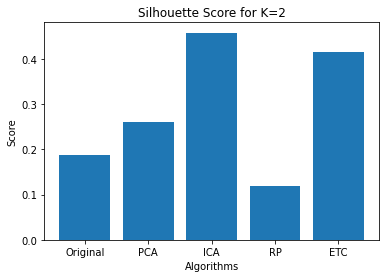

In [118]:
algos = ["Original","PCA","ICA","RP","ETC"]
scores = [sil_original_scores[0],sil_pca_scores[0],sil_ica_scores[0],sil_rp_scores[0],sil_etc_scores[0]]

# creating the bar plot
plt.bar(algos, scores)
plt.xlabel("Algorithms")
plt.ylabel("Score")
plt.title("Silhouette Score for K=2")
plt.show()

In [104]:
range_n_clusters=list(range(2, 10, 1))
algo_name = "GMM"
ami_original_scores,ami_times = ami_analysis(X_train, range_n_clusters, algo_name)
ami_pca_scores,ami_pca_times = ami_analysis(X_pca, range_n_clusters, algo_name)
ami_ica_scores,ami_ica_times = ami_analysis(X_ica, range_n_clusters, algo_name)
ami_rp_scores,ami_rp_times = ami_analysis(X_rp, range_n_clusters, algo_name)
ami_etc_scores,ami_etc_times = ami_analysis(X_etc, range_n_clusters, algo_name)

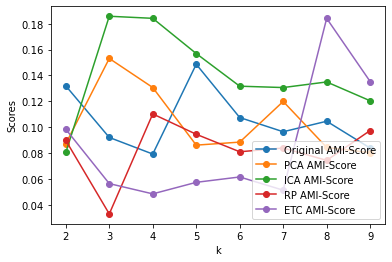

In [105]:
# plotting the scores against the value of k
plt.plot(range_n_clusters, ami_original_scores, 'o-', label='Original AMI-Score')
plt.plot(range_n_clusters, ami_pca_scores, 'o-', label='PCA AMI-Score')
plt.plot(range_n_clusters, ami_ica_scores, 'o-', label='ICA AMI-Score')
plt.plot(range_n_clusters, ami_rp_scores, 'o-', label='RP AMI-Score')
plt.plot(range_n_clusters, ami_etc_scores, 'o-', label='ETC AMI-Score')
plt.xlabel('k')
plt.ylabel('Scores')
plt.legend(loc=4)
plt.show()

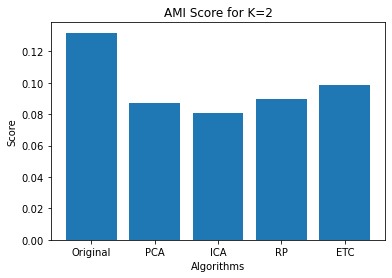

In [117]:
algos = ["Original","PCA","ICA","RP","ETC"]
scores = [ami_original_scores[0],ami_pca_scores[0],ami_ica_scores[0],ami_rp_scores[0],ami_etc_scores[0]]

# creating the bar plot
plt.bar(algos, scores)
plt.xlabel("Algorithms")
plt.ylabel("Score")
plt.title("AMI Score for K=2")
plt.show()